In [ ]:
import pysam
import pandas as pd
import numpy as np
from os import system
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order = "FN","FP","TP"

## Read-level Analysis

In [3]:
# load the meta isolate into a dictionary
def get_isolate_meta():
  metadata_file = "../../isolates/metadata.txt"
  df = pd.read_csv(metadata_file, sep=" ",header=0)
  def f(filename):
    return filename.split("_")[0]
  df["name"] = df["filename"].apply(f)
  df.index = df["name"]
  return df.to_dict()

In [10]:
get_isolate_meta()

{'species': {'SRR12858244': 'Escherichia_coli',
  'SRR12095308': 'Klebsiella_penumoniae',
  'SRR1656357': 'Bacteroides_fragilis',
  'SRR1655754': 'Acinetobacter_pittii',
  'SRR12401948': 'Xylella_fastidiosa',
  'SRR7649255': 'Bacillus_sp',
  'SRR1656094': 'Clostridium_sporogenes',
  'SRR1612632': 'Enterobacter_cloacae',
  'SRR17166930': 'Enterococcus_faecalis',
  'SRR11948590': 'Staphylococcus_aureus',
  'SRR12183943': 'Aeromonas_sp',
  'SRR14728047': 'Alcaligenes_sp',
  'SRR1656049': 'Achromobacter_xylosoxidans',
  'SRR8986834': 'Bacteroides_sp',
  'SRR1656434': 'Bifidobacterium_scardovii',
  'SRR13001669': 'Campylobacter_jejuni',
  'SRR13001651': 'Campylobacter_coli',
  'SRR9720109': 'Clostridium_sp',
  'SRR10175728': 'Clostridioides_difficile',
  'SRR11109149': 'Paeniclostridium_sordellii',
  'SRR1655328': 'Enterococcus_sp',
  'SRR12245564': 'Enterococcus_faecium',
  'SRR8782623': 'Fusobacterium_sp',
  'SRR9720093': 'Lactobacillus_sp',
  'SRR5929663': 'Methanobrevibacter_smithii',
 

## function definition

In [4]:
def read_go_where(bam_name, total_reads, better_analyze=False):
  samfile = pysam.AlignmentFile(bam_name, "rb")
  total = 0
  fp = 0
  dic = get_isolate_meta()["species"]
  species_count = dict()
  for read in samfile.fetch():
    if read.is_supplementary or read.is_secondary:
      # print(".",end="",flush=True)
      continue
    else:
      total += 1
      if not (read.query_name.startswith("read") or read.query_name.startswith("_")):
        id = read.query_name.split(".")[0]
        species = dic[id]
        if species not in species_count:
          species_count[species] = 1
        else: species_count[species] += 1
        # break
        fp += 1
  if better_analyze:
    for sp in species_count.keys():
      print(f"{sp}: ", species_count[sp])
  # print(f"FN: {total_reads - total + fp}, FP: {fp}, TP: {total - fp}")
  return total_reads - total + fp, fp, total-fp

In [5]:
def snp_go_where(vcf_name, snp_lst):
  '''return FN, FP, TP of snp calling on the provided output'''
  # def plot_coverage_snp(fullname, species, ref='abundant_species')
  fn, fp, tp = read_vcf(vcf_name, snp_lst)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  print(fn,fp,tp, ssty, preci)
  # data = data.melt("coverage",var_name=' ', value_name='value')
  # print(data)
  # sns.catplot(data=data, x='coverage', y='value',hue=' ',kind="point")

In [5]:
ref = ["target_species", "abundant_species","database"]

In [9]:
species = "isolate_jumbo"
total_reads = 3423158
for reftype in ref:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads,better_analyze=False)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
FN: 978472, FP: 1020, TP: 2444686
abundant_species
FN: 980992, FP: 157, TP: 2442166
database
FN: 1177377, FP: 1, TP: 2245781


In [17]:
species = "isolate_jumbo_read_diff_from_ref" # 0.9 thresh for assembly
total_reads = 3243278
for reftype in ["target_species","abundant_species","database","assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
{'Escherichia_coli': 2421, 'Klebsiella_penumoniae': 280, 'Coprococcus_comes': 2, 'Pseudomonas_aeruginosa': 7, 'Yersinia_enterocolitica': 57, 'Aeromonas_sp': 498, 'Xylella_fastidiosa': 3, 'Acinetobacter_sp': 11, 'Acinetobacter_pittii': 4, 'Plesiomonas_shigelloides': 87, 'Clostridium_sp': 2, 'Vibrio_sp': 27, 'Methanobrevibacter_smithii': 3, 'Campylobacter_jejuni': 1, 'Enterobacter_cloacae': 30, 'Clostridioides_difficile': 1, 'Achromobacter_xylosoxidans': 5, 'Paeniclostridium_sordellii': 2}
FN: 1230809, FP: 3441, TP: 2012469
abundant_species
{'Escherichia_coli': 1762, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 37, 'Aeromonas_sp': 1, 'Methanobrevibacter_smithii': 3, 'Yersinia_enterocolitica': 2, 'Vibrio_sp': 2, 'Acinetobacter_sp': 1}
FN: 1241790, FP: 1810, TP: 2001488
database
{'Escherichia_coli': 125, 'Coprococcus_comes': 1}
FN: 1356370, FP: 126, TP: 1886908
assembly
{'Escherichia_coli': 1100, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 18, 'Methanobrevibacter_sm

In [18]:
species = "isolate_jumbo_read_diff_from_ref" # 0.5 thresh for assembly
total_reads = 3243278
for reftype in ["target_species","abundant_species","database","assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
{'Escherichia_coli': 2421, 'Klebsiella_penumoniae': 280, 'Coprococcus_comes': 2, 'Pseudomonas_aeruginosa': 7, 'Yersinia_enterocolitica': 57, 'Aeromonas_sp': 498, 'Xylella_fastidiosa': 3, 'Acinetobacter_sp': 11, 'Acinetobacter_pittii': 4, 'Plesiomonas_shigelloides': 87, 'Clostridium_sp': 2, 'Vibrio_sp': 27, 'Methanobrevibacter_smithii': 3, 'Campylobacter_jejuni': 1, 'Enterobacter_cloacae': 30, 'Clostridioides_difficile': 1, 'Achromobacter_xylosoxidans': 5, 'Paeniclostridium_sordellii': 2}
FN: 1230809, FP: 3441, TP: 2012469
abundant_species
{'Escherichia_coli': 1762, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 37, 'Aeromonas_sp': 1, 'Methanobrevibacter_smithii': 3, 'Yersinia_enterocolitica': 2, 'Vibrio_sp': 2, 'Acinetobacter_sp': 1}
FN: 1241790, FP: 1810, TP: 2001488
database
{'Escherichia_coli': 125, 'Coprococcus_comes': 1}
FN: 1356370, FP: 126, TP: 1886908
assembly
{'Escherichia_coli': 1177, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 15, 'Methanobrevibacter_sm

In [16]:
species = "isolate_jumbo_read_diff_from_ref_corrected"
total_reads = 3243278
for reftype in ["target_species","abundant_species", "assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
{'Escherichia_coli': 2308, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 274, 'Pseudomonas_aeruginosa': 7, 'Yersinia_enterocolitica': 57, 'Aeromonas_sp': 498, 'Xylella_fastidiosa': 3, 'Acinetobacter_sp': 11, 'Acinetobacter_pittii': 4, 'Plesiomonas_shigelloides': 87, 'Clostridium_sp': 2, 'Vibrio_sp': 27, 'Methanobrevibacter_smithii': 3, 'Campylobacter_jejuni': 1, 'Enterobacter_cloacae': 30, 'Clostridioides_difficile': 1, 'Achromobacter_xylosoxidans': 5, 'Paeniclostridium_sordellii': 2}
FN: 1264048, FP: 3322, TP: 1979230
abundant_species
{'Escherichia_coli': 1624, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 33, 'Aeromonas_sp': 1, 'Methanobrevibacter_smithii': 3, 'Yersinia_enterocolitica': 2, 'Vibrio_sp': 2, 'Acinetobacter_sp': 1}
FN: 1277632, FP: 1668, TP: 1965646
assembly
{'Escherichia_coli': 956, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 20, 'Methanobrevibacter_smithii': 2}
FN: 2254132, FP: 980, TP: 989146


In [19]:
species = "isolate_jumbo_read_diff_from_ref_corrected"
total_reads = 3243278
for reftype in ["target_species","abundant_species", "assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
{'Escherichia_coli': 2308, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 274, 'Pseudomonas_aeruginosa': 7, 'Yersinia_enterocolitica': 57, 'Aeromonas_sp': 498, 'Xylella_fastidiosa': 3, 'Acinetobacter_sp': 11, 'Acinetobacter_pittii': 4, 'Plesiomonas_shigelloides': 87, 'Clostridium_sp': 2, 'Vibrio_sp': 27, 'Methanobrevibacter_smithii': 3, 'Campylobacter_jejuni': 1, 'Enterobacter_cloacae': 30, 'Clostridioides_difficile': 1, 'Achromobacter_xylosoxidans': 5, 'Paeniclostridium_sordellii': 2}
FN: 1264048, FP: 3322, TP: 1979230
abundant_species
{'Escherichia_coli': 1624, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 33, 'Aeromonas_sp': 1, 'Methanobrevibacter_smithii': 3, 'Yersinia_enterocolitica': 2, 'Vibrio_sp': 2, 'Acinetobacter_sp': 1}
FN: 1277632, FP: 1668, TP: 1965646
assembly
{'Escherichia_coli': 1030, 'Coprococcus_comes': 2, 'Klebsiella_penumoniae': 16, 'Methanobrevibacter_smithii': 2, 'Yersinia_enterocolitica': 2}
FN: 2093615, FP: 1052, TP: 1149663


## After changing combine_fasta so now it includes both close and abundant

In [16]:
species = "isolate_jumbo_read_diff_from_ref" # 0.5 thresh for assembly
total_reads = 3243278
for reftype in ["target_species","abundant_species","database","assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads,better_analyze=False)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
FN: 1230809, FP: 3441, TP: 2012469
abundant_species
FN: 1283366, FP: 136, TP: 1959912
database
FN: 1356370, FP: 126, TP: 1886908
assembly
FN: 2098689, FP: 87, TP: 1144589


In [11]:
species = "isolate_jumbo_read_diff_from_ref_corrected" # 0.5 thresh for assembly
total_reads = 3243278
for reftype in ["target_species","abundant_species","assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
FN: 1261112, FP: 3328, TP: 1982166
abundant_species
FN: 1283366, FP: 136, TP: 1959912
assembly
FN: 2098471, FP: 95, TP: 1144807


In [44]:
species = "isolate_jumbo_read_not_very_diff_from_ref" # 0.5 thresh for assembly
total_reads = 6896388//2
for reftype in ["target_species","abundant_species","assembly","database"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
FN: 1004905, FP: 3441, TP: 2443289
abundant_species
FN: 1041724, FP: 153, TP: 2406470
assembly
FN: 1613458, FP: 124, TP: 1834736
database
FN: 1204330, FP: 126, TP: 2243864


In [14]:
species = "isolate_jumbo_read_not_very_diff_from_ref_corrected" # 0.5 thresh for assembly
total_reads = 6896388//2
for reftype in ["target_species","abundant_species","assembly"]:
  print(reftype)
  fn,fp,tp=read_go_where(f"../../output/{species}/{reftype}.filt.bam",total_reads=total_reads)
  print(f"FN: {fn}, FP: {fp}, TP: {tp}")

target_species
FN: 1008473, FP: 3394, TP: 2439721
abundant_species
FN: 1041724, FP: 153, TP: 2406470
assembly
FN: 1613150, FP: 121, TP: 1835044


### SNP analysis

In [32]:
sample = "isolate_jumbo_read_not_very_diff_from_ref"
kinds = ["target_species","abundant_species","database"]
species = "Escherichia_marmotae"
for kind in kinds:
  vcf = f"../../output/{sample}/{kind}.filt.vcf"
  snplist = f"../../refs/fna_seq/{species}.snp.lst"
  fn, fp, tp = read_vcf(vcf, snplist)
  print(kind, "FN:", fn, "FP:", fp, "TP:", tp)

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


target_species FN: 262 FP: 469 TP: 4566
abundant_species FN: 284 FP: 389 TP: 4544
database FN: 317 FP: 386 TP: 4511


[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


In [35]:
sample = "isolate_jumbo_read_diff_from_ref_corrected"
kinds = ["target_species","abundant_species"]
species = "Escherichia_marmotae"
for kind in kinds:
  vcf = f"../../output/{sample}/{kind}.filt.vcf"
  snplist = f"../../refs/fna_seq/{species}.snp.lst"
  fn, fp, tp = read_vcf(vcf, snplist)
  print(kind, "FN:", fn, "FP:", fp, "TP:", tp)

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)


target_species FN: 4805 FP: 25372 TP: 23


[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)


abundant_species FN: 4806 FP: 25927 TP: 22


### should try making barplot here with seaborn / python

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html 

In [38]:
species = "Esp"
total_reads = 3386010
for reftype in ref:
  print(reftype)
  read_go_where(f"../../output/spiked_{species}/{reftype}.filt.bam")

target_species
FP: 185319, TP: 3383482
abundant_species
FP: 179389, TP: 3382743
database
FP: 21005, TP: 3191411


In [47]:
species = "marm"
total_reads=2448153 * 2
for reftype in ["abundant_species","target_species"]:
  print(reftype)
  read_go_where(f"../../output/spiked_{species}/{reftype}.filt.bam")

target_species
FP: 123259, TP: 3362394
abundant_species
FP: 112898, TP: 3359204
database
.FP: 7944, TP: 3222288


In [43]:
species = "albertii"
total_reads=3723618
for reftype in ref:
  print(reftype)
  read_go_where(f"../../output/spiked_{species}/{reftype}.filt.bam")

target_species
FP: 128346, TP: 3720857
abundant_species
FP: 122498, TP: 3720377
database
FP: 16947, TP: 3612790


In [14]:
species = "strep_vest"
total_reads=1467372
for reftype in ref:
  print(reftype)
  read_go_where(f"../../output/spiked_{species}/{reftype}.filt.bam")

target_species
FP: 323954, TP: 1466190
abundant_species
FP: 136954, TP: 1458350
database
FP: 60604, TP: 1345617


In [9]:
species = "egg_lenta"
total_reads=3632178 # not true anymore
for reftype in ["abundant_species","target_species","assembly",]:
  print(reftype)
  read_go_where(f"../../output/spiked_{species}/{reftype}.unfilt.bam", total_reads)

abundant_species
FN: 62609, FP: 59717, TP: 3569569
target_species
FN: 0, FP: 439758, TP: 3632178
assembly
FN: 939677, FP: 34697, TP: 2692501


In [12]:
species = "egg_lenta"
total_reads=3632178 # not true anymore
for reftype in ["abundant_species","target_species","assembly","database"]:
  print(reftype)
  read_go_where(f"../../output/spiked_{species}/{reftype}.filt.bam", total_reads)

abundant_species
FN: 64937, FP: 40548, TP: 3567241
target_species
FN: 2365, FP: 127800, TP: 3629813
assembly
FN: 941443, FP: 26925, TP: 2690735
database
FN: 277977, FP: 32338, TP: 3354201


### Plot Coverage

In [4]:
sns.set_theme()
sns.set_style("whitegrid")
def plot_coverage(species, total_reads):
  param = [i for i in range(1,10)]
  fn = np.zeros((len(param),))
  fp = np.zeros((len(param),))
  tp = np.zeros((len(param),))
  for t in param:
    print(t, end="...",flush=True)
    fn[t-1], fp[t-1], tp[t-1] = read_go_where(f"../../output/spiked_{species}/abundant_species.{t}.filt.bam", total_reads)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  data = pd.DataFrame({'coverage': param,
          'sensitivity':ssty,
          'precision':preci
        })
  data = data.melt("coverage",var_name=' ', value_name='value')
  # print(data)
  sns.catplot(data=data, x='coverage', y='value',hue=' ',kind="point")
  plt.show()

In [6]:
total_reads = {"egg_lenta": 1816066,
               "marm": 734458}
total_reads

{'egg_lenta': 1816066, 'marm': 734458}

1...2...3...4...5...6...7...8...9...

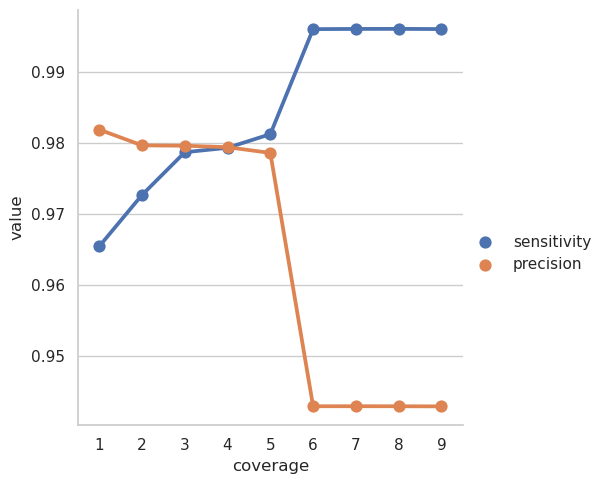

In [10]:
species = "egg_lenta"
plot_coverage(species, total_reads[species])

1...2...3...4...5...6...7...8...9...

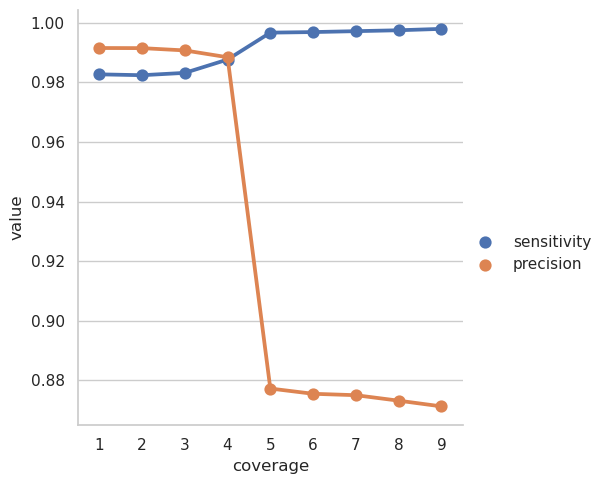

In [11]:
species = "marm"
plot_coverage(species, total_reads[species])

### Plot ANI

In [7]:
def plot_ANI(species, total_reads):
  param = [0.75, 0.77, 0.8, 0.82, 0.85]
  fn = np.zeros((len(param),))
  fp = np.zeros((len(param),))
  tp = np.zeros((len(param),))
  for i in range(len(param)):
    t = param[i]
    print(t, end="...",flush=True)
    fn[i], fp[i], tp[i] = read_go_where(f"../../output/spiked_{species}/abundant_species.{t}.filt.bam", total_reads)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  data = pd.DataFrame({'ANI': param,
          'sensitivity':ssty,
          'precision':preci
        })
  data = data.melt("ANI",var_name=' ', value_name='value')
  # print(data)
  sns.catplot(data=data, x='ANI', y='value',hue=' ',kind="point")
  plt.show()

0.75...0.77...0.8...0.82...0.85...

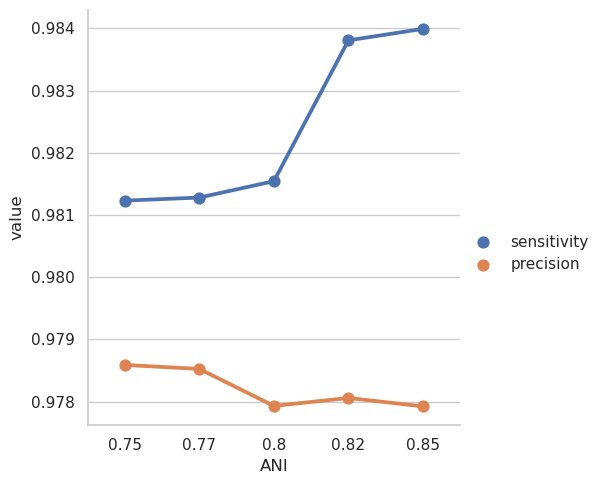

0.75...0.77...0.8...0.82...0.85...

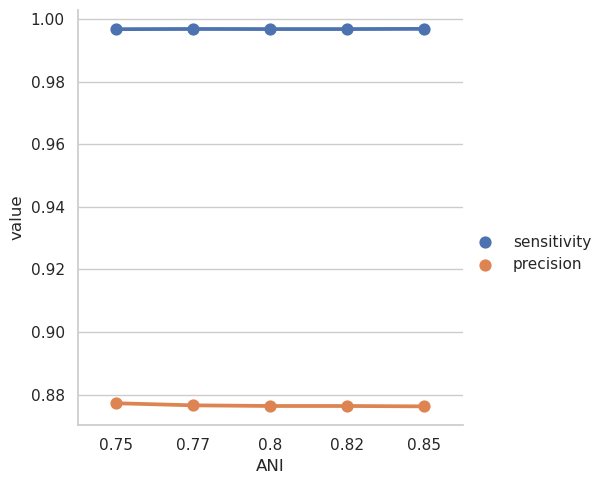

In [8]:
species = "egg_lenta"
plot_ANI(species, total_reads[species])
species = "marm"
plot_ANI(species, total_reads[species])

## SNP-level analysis

In [8]:
import seaborn as sns
def analyze_tsv(filename):
    df = pd.read_csv(filename, sep="\t", header=0)
    tp_df = df[df["kind"] == "TP"]
    fn_df = df[df["kind"] == "FN"]
    fp_df = df[df["kind"] == "FP"]
    sns.displot(fp_df, x="position", binwidth=10000)
    plt.title(filename)
    fn, fp, tp = len(fn_df), len(fp_df), len(tp_df)
    # print(tp["DP_bam"].mean())
    sensitivity = tp / (tp+fn)
    precision = 1 - fp/(fp+tp)
    return (f"{fn}\t{fp}\t{tp}\t{sensitivity}\t{precision}")

In [9]:
read_vcf("../../output/isolate_jumbo_read_not_very_diff_from_ref/abundant_species.filt.vcf")

TypeError: read_vcf() missing 1 required positional argument: 'snp'

In [6]:
def extract_lst(snplst,length=11):
  lst = pd.read_csv(snplst, sep="\t", header=2, dtype=str)
  # print(lst)
    # df = lst[lst["orig_position"] == lst["new_position"]]
  lst["position"] = lst["orig_position"].astype(str)
  lst["contig"] = (lst['# seq_id']).str[:length]
  return lst

def read_vcf(vcf, snp):
  ''' take in unfiltered vcf, fitler based on coverage, and compare to SNP-list to output variant-calling performance'''
  def parse_vcf(fname):
    yield from pysam.VariantFile(fname).fetch()
  my_snps = pd.DataFrame((
        {
            'contig': record.contig,
            'position': str(record.pos),
            'ref': record.alleles[0],
            'alt': alt,
            'SB': record.info["SB"],
            'DP': record.info["DP"],
            'AF': str(record.info["AF"]).split(',')[idx],
        }
      for record in parse_vcf(vcf)
    for idx, alt in enumerate(record.alts) 
  ))
  contiglen = len(my_snps["contig"].iloc[1])
  true_snps = extract_lst(snp, length=contiglen)
  mean_cov =  my_snps["DP"].mean()
  my_snps = my_snps[my_snps["DP"] < 3 * mean_cov]
  # print((true_snps["contig"]), (my_snps["contig"]))
  df = my_snps.merge(true_snps, on=["contig","position"], how="outer",suffixes=("_true","_lofreq"))
  df['true'] = ~ df['# seq_id'].isnull()
  df['lofreq'] = ~ df['AF'].isnull()
  def assign_row_kind(row):
    if row['true'] and row['lofreq']: return 'TP'
    elif row['true']:  return 'FN'
    elif row['lofreq']: return 'FP'
    else: raise Exception(row)
  df['kind'] = df.apply(assign_row_kind, axis=1)
  # print(df)
  d = df['kind'].value_counts()
  if 'FP' not in d:
    d['FP'] = 0
  return d['FN'],d['FP'],d['TP']


### Coverage

In [11]:
def plot_coverage_snp(fullname, species, ref='abundant_species'):
  param = [i for i in range(1,10)]
  snp = f"../../refs/fna_seq/{fullname}.snp.lst"
  fn = np.zeros((len(param),))
  fp = np.zeros((len(param),))
  tp = np.zeros((len(param),))
  for t in param:
    vcf = f"../../output/spiked_{species}/{ref}.{t}.filt.vcf"
    print(t, end="...",flush=True)
    fn[t-1], fp[t-1], tp[t-1] = read_vcf(vcf, snp)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  data = pd.DataFrame({'coverage': param,
          'sensitivity':ssty,
          'precision':preci
        })
  data = data.melt("coverage",var_name=' ', value_name='value')
  # print(data)
  sns.catplot(data=data, x='coverage', y='value',hue=' ',kind="point")

1...2...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


3...4...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


5...6...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


7...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


8...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


9...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


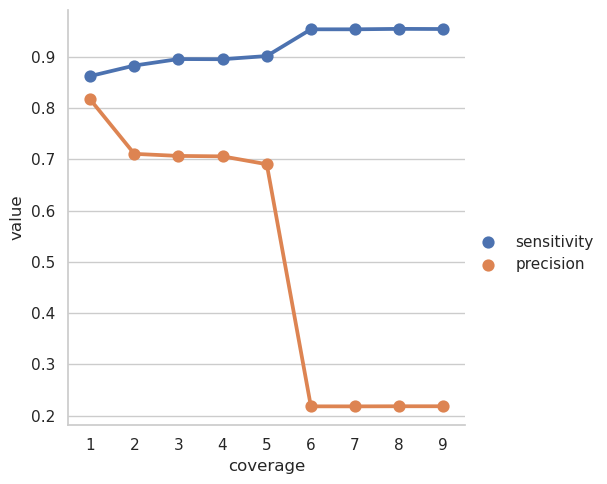

In [12]:
species = "egg_lenta"
fullname = "Eggerthella_lenta"
plot_coverage_snp(fullname, species)

1...2...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


3...4...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


5...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


6...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


7...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


8...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


9...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


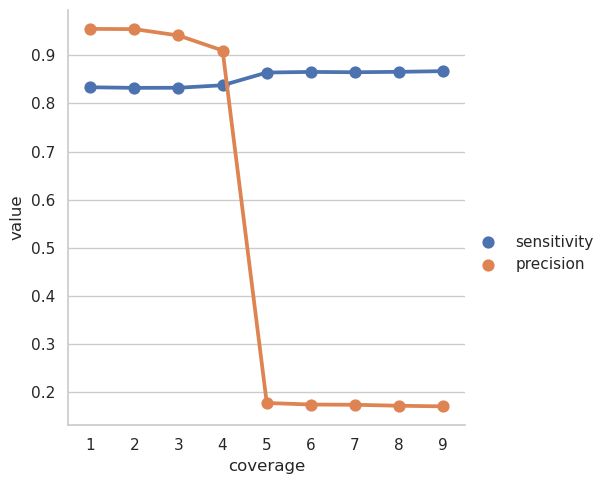

In [13]:
species = "marm"
fullname = "Escherichia_marmotae"
plot_coverage_snp(fullname, species)

### ANI

In [14]:
def plot_ANI_snp(fullname, species, ref='abundant_species'):
  param = [0.75, 0.77, 0.8, 0.82, 0.85]
  snp = f"../../refs/fna_seq/{fullname}.snp.lst"
  fn = np.zeros((len(param),))
  fp = np.zeros((len(param),))
  tp = np.zeros((len(param),))
  for i in range(len(param)):
    t = param[i]
    vcf = f"../../output/spiked_{species}/{ref}.{t}.filt.vcf"
    print(t, end="...",flush=True)
    fn[i], fp[i], tp[i] = read_vcf(vcf, snp)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  data = pd.DataFrame({'coverage': param,
          'sensitivity':ssty,
          'precision':preci
        })
  data = data.melt("coverage",var_name=' ', value_name='value')
  # print(data)
  sns.catplot(data=data, x='coverage', y='value',hue=' ',kind="point")

0.75...0.77...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.8...0.82...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.85...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


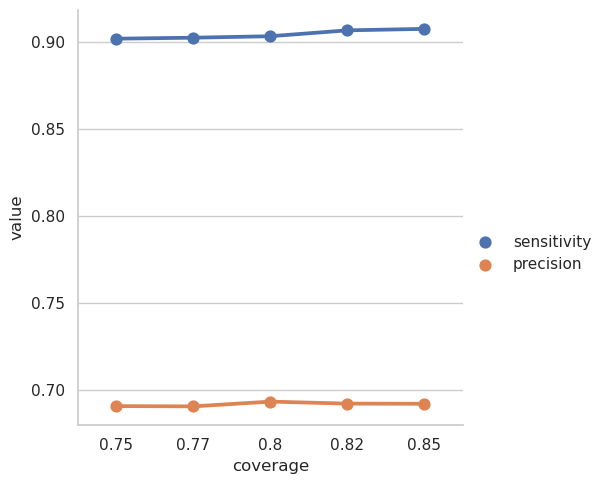

In [15]:
species = "egg_lenta"
fullname = "Eggerthella_lenta"
plot_ANI_snp(fullname, species)

0.75...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.77...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.8...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.82...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.85...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


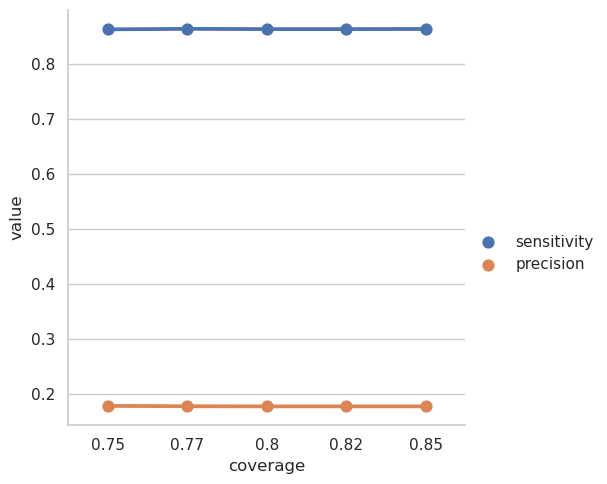

In [16]:
species = "marm"
fullname = "Escherichia_marmotae"
plot_ANI_snp(fullname, species)

## Assembly contig threshold

In [20]:
def plot_assembly_thresh(fullname, species, ref='assembly'):
  param = [0.0, 0.2, 0.4,0.6,0.8, 0.9]
  snp = f"../../refs/fna_seq/{fullname}.snp.lst"
  fn = np.zeros((len(param),))
  fp = np.zeros((len(param),))
  tp = np.zeros((len(param),))
  for i in range(len(param)):
    t = param[i]
    vcf = f"../../output/spiked_{species}/{ref}.{t}.filt.vcf"
    print(t, end="...",flush=True)
    fn[i], fp[i], tp[i] = read_vcf(vcf, snp)
  # vcf = f"../../output/spiked_{species}/{ref}.filt.vcf"
  # fn[len(param)], fp[len(param)], tp[len(param)] = read_vcf(vcf, snp)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  data = pd.DataFrame({'coverage': param,
          'sensitivity':ssty,
          'precision':preci
        })
  data = data.melt("coverage",var_name=' ', value_name='value')
  # print(data)
  sns.catplot(data=data, x='coverage', y='value',hue=' ',kind="point")
  plt.show()

In [22]:
def plot_assembly_thresh_read(fullname, species, ref='assembly'):
  param = [0.0, 0.2, 0.4,0.6,0.8, 0.9]
  snp = f"../../refs/fna_seq/{fullname}.snp.lst"
  fn = np.zeros((len(param),))
  fp = np.zeros((len(param),))
  tp = np.zeros((len(param),))
  for i in range(len(param)):
    t = param[i]
    vcf = f"../../output/spiked_{species}/{ref}.{t}.filt.vcf"
    print(t, end="...",flush=True)
    fn[i], fp[i], tp[i] = read_go_where(f"../../output/spiked_{species}/assembly.{t}.filt.bam",total_reads[species])
  # vcf = f"../../output/spiked_{species}/{ref}.filt.vcf"
  # fn[len(param)], fp[len(param)], tp[len(param)] = read_vcf(vcf, snp)
  ssty = tp / (tp + fn)
  preci = tp / (tp + fp)
  data = pd.DataFrame({'coverage': param,
          'sensitivity':ssty,
          'precision':preci
        })
  data = data.melt("coverage",var_name=' ', value_name='value')
  # print(data)
  sns.catplot(data=data, x='coverage', y='value',hue=' ',kind="point")
  plt.show()

0.0...0.2...0.4...0.6...0.8...0.9...

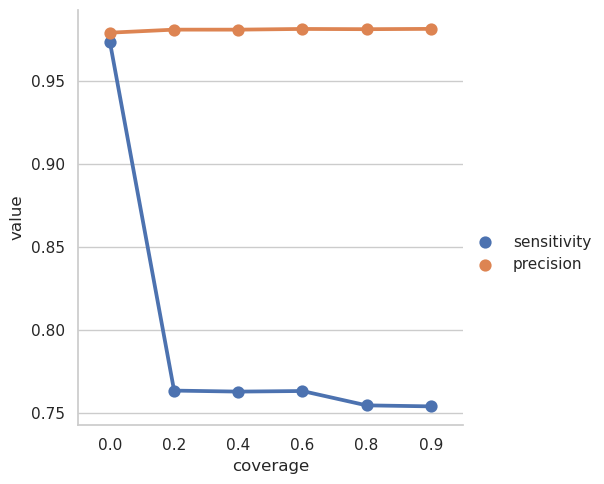

0.0...0.2...0.4...0.6...0.8...0.9...

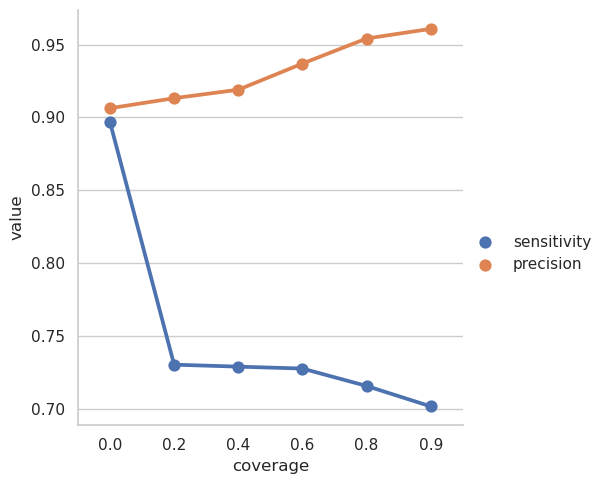

In [23]:
species = "egg_lenta"
fullname = "Eggerthella_lenta"
plot_assembly_thresh_read(fullname,species)
species = "marm"
fullname = "Escherichia_marmotae"
plot_assembly_thresh_read(fullname,species)

0.0...0.2...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.4...0.6...0.8...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.9...

[W::vcf_parse] Contig 'NC_013204.1' is not defined in the header. (Quick workaround: index the file with tabix.)


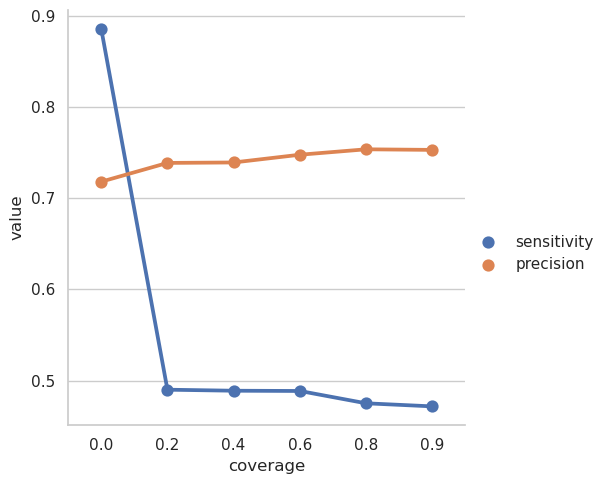

0.0...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.2...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.4...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.6...0.8...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


0.9...

[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025979.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025980.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP025981.1' is not defined in the header. (Quick workaround: index the file with tabix.)


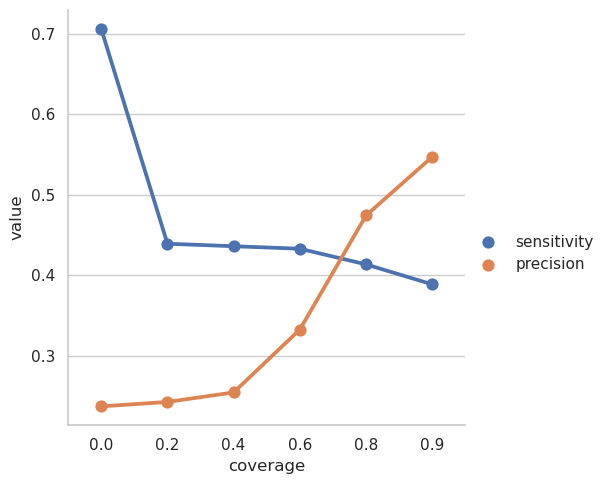

In [21]:
species = "egg_lenta"
fullname = "Eggerthella_lenta"
plot_assembly_thresh(fullname,species)
species = "marm"
fullname = "Escherichia_marmotae"
plot_assembly_thresh(fullname,species)

# Other Experiments

### Check new Bam

In [5]:
def get_contigs(ref):  
    contig_names = []
    with open(ref, "r") as f:
        lines = f.readlines()
        for line in lines:
            if line[0] == ">":
                contig = (line.split()[0])[1:]
                contig_names.append(contig.strip())
                # print(contig)
        f.close()
    contig_names.sort()
    return contig_names

In [6]:
def check_bam(bam_name, species_name, total_reads=0):
  species_ref = f"/mnt/volume1/pipeline/refs/fna_seq/{species_name}.fasta"
  with open(species_ref, "r") as f:
    data = f.read().replace(" ","")
    genome_size = (len(data))
    f.close()
  samfile = pysam.AlignmentFile(bam_name, "rb")
  total = 0
  contigs = get_contigs(species_ref)[::-1]
  print(" ".join(contigs))
  for contig in contigs:
    # print(contig)
    cnt = 0
    try:
      for read in samfile.fetch(contig):
        if read.is_supplementary or read.is_secondary:
          # print(".",end="",flush=True)
          continue
        else:
          total += 1
          cnt += 1
    except:
      print("invalid contig", contig)
    # print(cnt)
      # if not (read.query_name.startswith("read") or read.query_name.startswith("_")):
        # print(read.query_name)
        # break
        # fp += 1
  # print(f"FN: {total_reads - total + fp}, FP: {fp}, TP: {total - fp}")
  print(total * 100 / genome_size)
  # return total_reads - total + fp, fp, total-fp

In [ ]:
for species in ["Escherichia_albertii","Escherichia_marmotae","Escherichia_fergusonii", "Escherichia_sp"]:
  print(species)
  check_bam("/mnt/volume1/pipeline/data/e_coli_sim.bam", species)

Breadth of coverage:
- ferg: 15.8% of genome
- marm: 5.06% of genome
- albertii: 5.2% of genome
- E. sp: 15.05% of genome

## Processing time-series vcf into Q matrix

In [4]:
def vcf_to_Qmatrix(vcf):
  ''' take a vcf file and return a Q matrix in TBD format'''
  def parse_vcf(fname):
    yield from pysam.VariantFile(fname).fetch()
  my_snps = pd.DataFrame((
        {
            'contig': record.contig,
            'position': str(record.pos),
            'ref': record.alleles[0],
            'alt': alt,
            'SB': record.info["SB"],
            'DP': record.info["DP"],
            'AF': str(record.info["AF"]).split(',')[idx],
        }
      for record in parse_vcf(vcf)
    for idx, alt in enumerate(record.alts) 
  ))
  return my_snps

In [6]:
sample_lst = [f'F0507TV0{i}' for i in range(5)]
vcf_list = [f'../../output/{sample}/abundant_species.unfilt.vcf' for sample in sample_lst]
for vcf in vcf_list:
  df = vcf_to_Qmatrix(vcf)
  # the idea is to use merge and how="outer" ???
  print(df)

            contig position ref alt  SB   DP                    AF
0    NZ_CP033091.2      480   T   C   1  154  0.051947999745607376
1    NZ_CP033091.2     1076   T   C   5   62   0.06451600044965744
2    NZ_CP033091.2     1503   T   C   0  125    0.9919999837875366
3    NZ_CP033091.2     1650   A   C   1   93     0.935483992099762
4    NZ_CP033091.2     1656   G   T   1   98    0.9285709857940674
..             ...      ...  ..  ..  ..  ...                   ...
641  NZ_CP033091.2   130809   A   T   0   58   0.18965500593185425
642  NZ_CP033091.2   130879   G   A   0   92   0.09782599657773972
643  NZ_CP033091.2   130895   G   T   0   97   0.10309299826622009
644  NZ_CP033091.2   130978   C   T   0   69   0.18840600550174713
645  NZ_CP033091.2   131105   T   A   1   83   0.08433700352907181

[646 rows x 7 columns]
           contig position ref alt  SB  DP                  AF
0   NZ_CP033091.2    16844   A   T   0  19                 1.0
1   NZ_CP033091.2    16867   A   T   0  18    

[W::vcf_parse] Contig 'NZ_CP033091.2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP033091.2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP033091.2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP033091.2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NZ_CP033091.2' is not defined in the header. (Quick workaround: index the file with tabix.)


## Check bad reads

In [36]:
def write_bad_reads(bam_name, outfile):
  samfile = pysam.AlignmentFile(bam_name, "rb")
  outsam = pysam.AlignmentFile(outfile, "wb", template=samfile)
  dic = get_isolate_meta()["species"]
  species_count = dict()
  for read in samfile.fetch():
    if read.is_supplementary or read.is_secondary:
      # print(".",end="",flush=True)
      continue
    else:
      if not (read.query_name.startswith("read") or read.query_name.startswith("_")):
        id = read.query_name.split(".")[0]
        species = dic[id]
        outsam.write(read)
        

In [40]:
directory = "isolate_jumbo_read_not_very_diff_from_ref"
kinds = ["target_species","abundant_species","database"]
species = "Escherichia_marmotae"
for kind in kinds:
  bam = f"../../output/{directory}/{kind}.filt.bam"
  output = f"../../output/{directory}/{kind}.filt.bad.bam"
  write_bad_reads(bam, output)


In [ ]:
directory = "isolate_jumbo_read_not_very_diff_from_ref_corrected"
kinds = ["target_species","abundant_species","database"]
species = "modified1_Escherichia_marmotae"
for kind in kinds:
  bam = f"../../output/{directory}/{kind}.filt.bam"
  output = f"../../output/{directory}/{kind}.filt.bad.bam"
  write_bad_reads(bam, output)

In [43]:
directory = "isolate_jumbo_read_diff_from_ref"
kinds = ["target_species","abundant_species","database"]
species = "Escherichia_marmotae"
for kind in kinds:
  bam = f"../../output/{directory}/{kind}.filt.bam"
  output = f"../../output/{directory}/{kind}.filt.bad.bam"
  write_bad_reads(bam, output)

## Abnormal coverage

589	471	2962	0.8341312306392565	0.8628022138071657
311	1242	3240	0.9124190368910167	0.7228915662650602
100	11297	3456	0.9718785151856018	0.2342574391649156
1906	347	1644	0.4630985915492958	0.8257157207433451


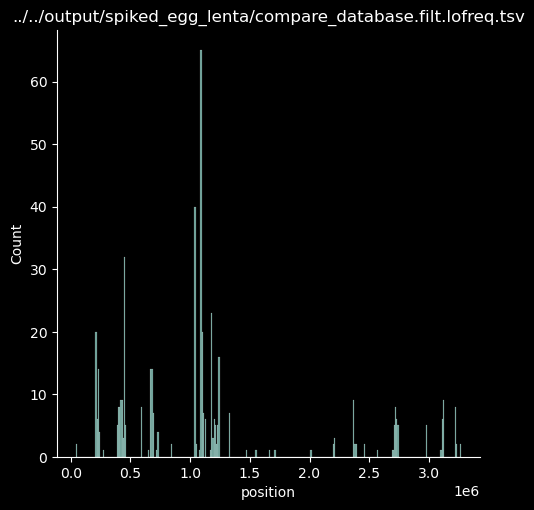

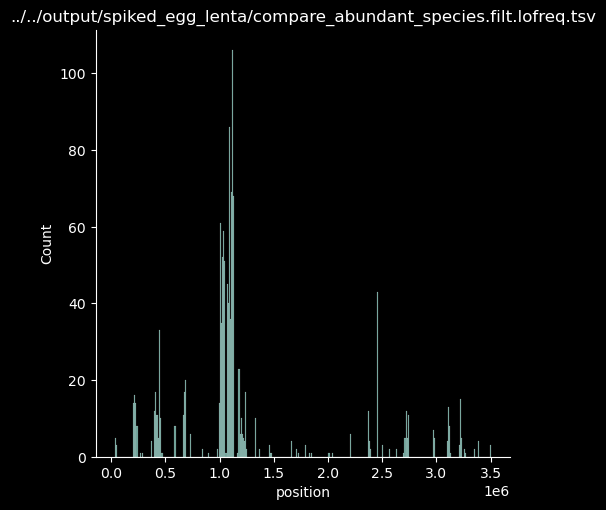

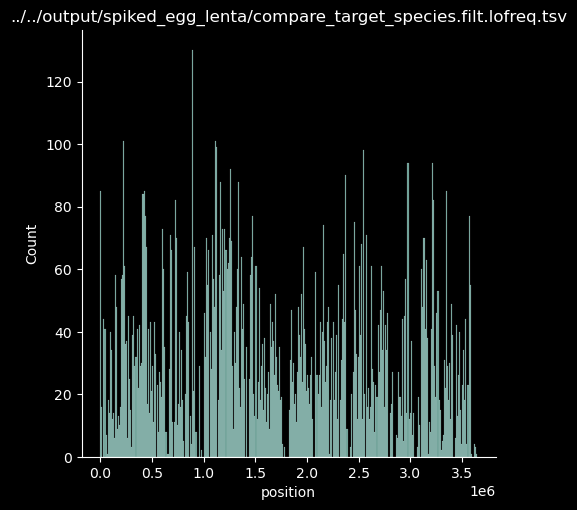

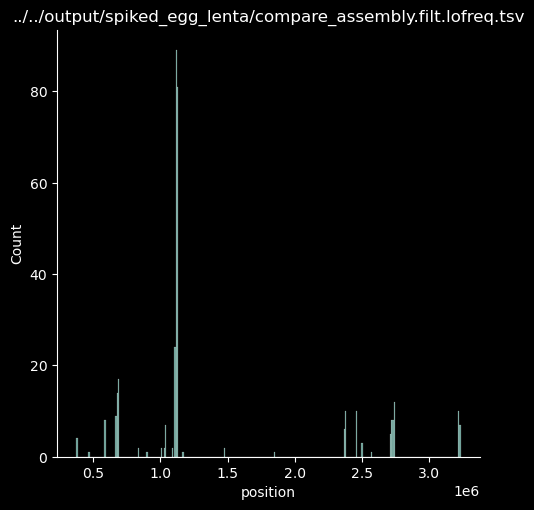

In [22]:
sample = "spiked_egg_lenta"
for species in ["database","abundant_species","target_species", "assembly"]:
  filename = f"../../output/{sample}/compare_{species}.filt.lofreq.tsv"
  print(analyze_tsv(filename))

# Analyze both read and SNP

In [7]:
import subprocess
def check_read_n_snp(result_dir, methods, fastq, snp=None,identifier='read'):
  bash_command = f"zcat {fastq} | grep '_180_' | wc -l"
  # print(bash_command)
  n_reads = int(subprocess.check_output(bash_command, shell=True, text=True))
  print("total", n_reads)
  dct = get_isolate_meta()["species"]
  # print(dct.keys())
  species_count = dict()
  total = np.zeros((len(methods),),dtype=int)
  fp = np.zeros((len(methods),),dtype=int)
  snp_tp = np.zeros((len(methods),),dtype=int)
  snp_fp = np.zeros((len(methods),),dtype=int)
  snp_fn = np.zeros((len(methods),),dtype=int)
  for i in range(len(methods)):
    method = methods[i]
    bam_file = f"{result_dir}/{method}.filt.sorted.bam"
    vcf_file = f"{result_dir}/{method}.filt.vcf"
    bam = pysam.AlignmentFile(bam_file, "rb")
    species_count = dict()
    for read in bam.fetch():
      if read.is_supplementary or read.is_secondary:
      # print(".",end="",flush=True)
        continue
      else:
        total[i] += 1
        if not (read.query_name.startswith(identifier)):
          fp[i] += 1
          id = read.query_name.split(".")[0]
          if read.query_name[0] != 'S': species = read.query_name[:4]
          else: species = dct[id]
          if species not in species_count:
            species_count[species] = 1
          else: species_count[species] += 1
    if snp != None:
      # print("SNPs on")
      snp_fn[i],snp_fp[i],snp_tp[i] = read_vcf(vcf_file, snp)
    print(method, species_count)
  print(total)
  fn = fp - total + n_reads * 2
  df = pd.DataFrame({"FN":fn, "FP":fp, "TP":total-fp})
  df['name'] = methods
  df["sensitivity"] = df["TP"] / (df['TP']+df['FN']) # tp / (tp + fn)
  df["precision"] = df['TP'] / (df['TP'] + df['FP']) # tp / (tp + fp)
  # print(df)
  snp_df = pd.DataFrame({"FN":snp_fn, "FP":snp_fp, "TP":snp_tp})
  snp_df['name'] = methods
  snp_df["sensitivity"] = snp_df["TP"] / (snp_df['TP']+snp_df['FN']) # tp / (tp + fn)
  snp_df["precision"] = snp_df['TP'] / (snp_df['TP'] + snp_df['FP']) 
  
  return df,snp_df
    
  
  

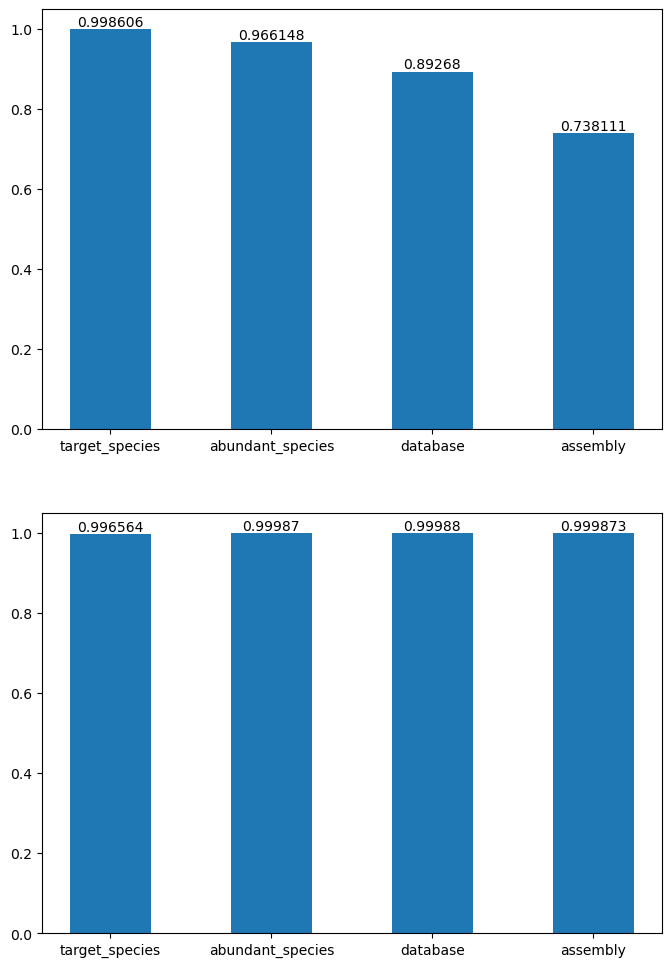

In [62]:
series = "1.1"
lst = ["target_species", "abundant_species", "database","assembly"]
read_df, snp_df = check_read_n_snp(f"../../output/{series}_read_same_as_ref", lst, f"../../data/{series[0]}.1_reads_R1.fq.gz")
fig,(ax1,ax2) = plt.subplots(2,figsize=(8,12))
bars = ax1.bar(read_df.index, read_df['sensitivity'],width=0.5)
ax1.bar_label(bars)
bars1 = ax2.bar(read_df.index, read_df['precision'],width=0.5)
ax2.bar_label(bars1)
plt.show()

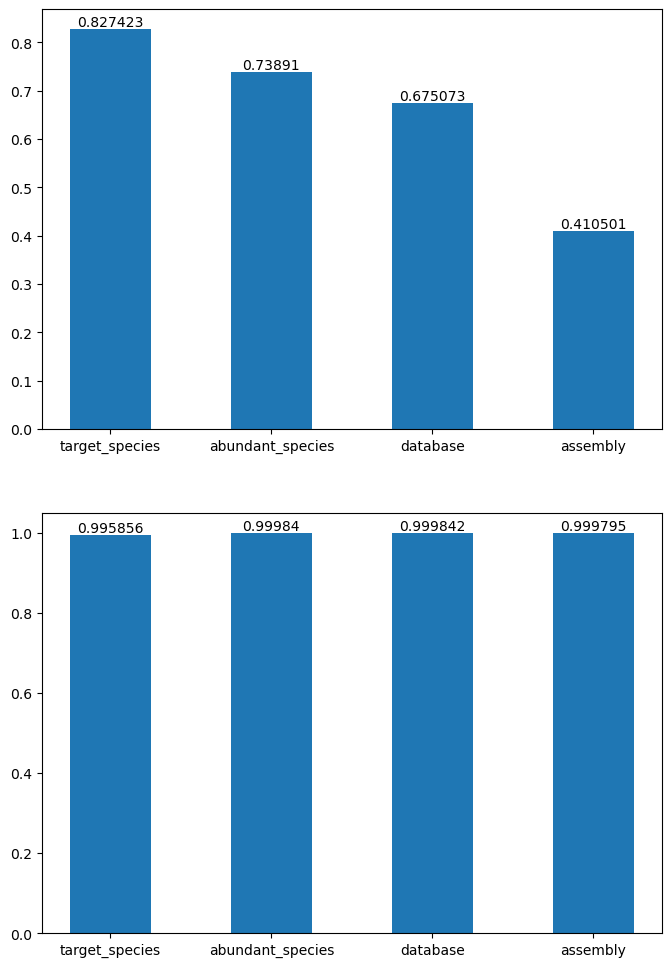

In [63]:
series = "1.2"
lst = ["target_species", "abundant_species", "database","assembly"]
read_df,snp_df=check_read_n_snp(f"../../output/{series}_read_same_as_ref", lst, f"../../data/{series[0]}.1_reads_R1.fq.gz")
fig,(ax1,ax2) = plt.subplots(2,figsize=(8,12))
bars = ax1.bar(read_df.index, read_df['sensitivity'],width=0.5)
ax1.bar_label(bars)
bars1 = ax2.bar(read_df.index, read_df['precision'],width=0.5)
ax2.bar_label(bars1)
plt.show()

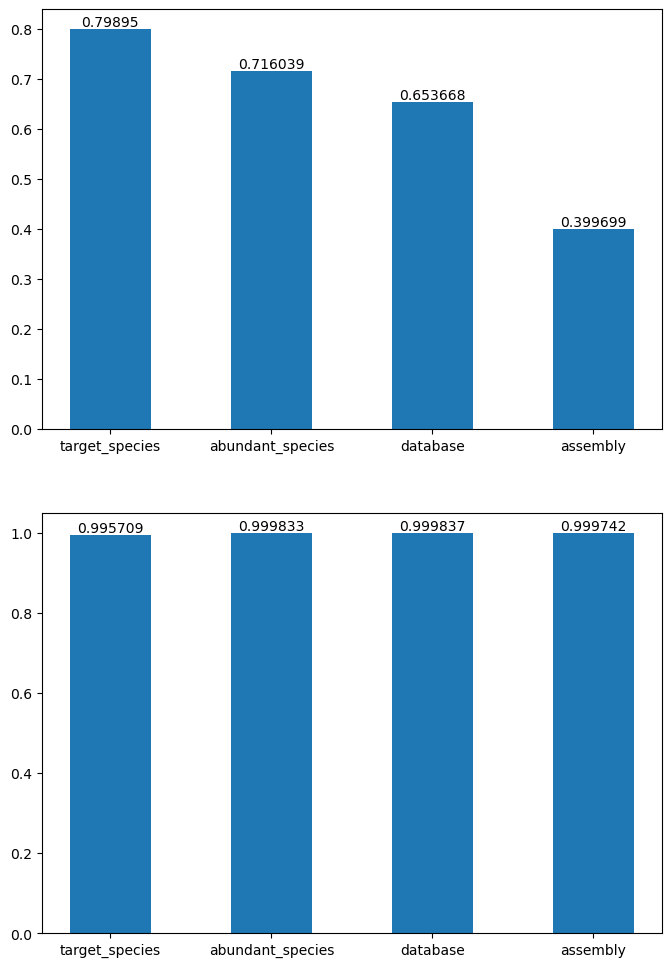

In [64]:
series = "1.3"
lst = ["target_species", "abundant_species", "database","assembly"]
read_df,snp_df=check_read_n_snp(f"../../output/{series}_read_same_as_ref", lst, f"../../data/{series[0]}.1_reads_R1.fq.gz")
fig,(ax1,ax2) = plt.subplots(2,figsize=(8,12))
bars = ax1.bar(read_df.index, read_df['sensitivity'],width=0.5)
ax1.bar_label(bars)
bars1 = ax2.bar(read_df.index, read_df['precision'],width=0.5)
ax2.bar_label(bars1)
plt.show()

In [13]:
def plot_sens_prec_read_n_snp(series):
  lst = ["target_species", "abundant_species", "assembly","database"]
  read_df, df = check_read_n_snp(f"../../output/{series}_read_same_as_ref", lst, f"../../data/{series[0]}.1_reads_R1.fq.gz",snp="../../refs/fna_seq/Escherichia_fergusonii.snp.lst",identifier="ferg")
  width = 0.25  # the width of the bars
  multiplier = 0
  x = np.arange(len(lst))
  fig, ax = plt.subplots(constrained_layout=True)

  for what in ['sensitivity','precision']:
      attribute=what
      measurement=read_df[what]
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  # ax.set_title('Different methods')
  ax.set_xticks(x + width, lst)
  ax.legend(loc='lower right', ncols=2)
  ax.set_ylim(0, 1)
  # read_df.plot(x='name', y=["sensitivity","precision"],kind="bar")
  plt.show()
  fig, ax = plt.subplots(constrained_layout=True)

  for what in ['sensitivity','precision']:
      attribute=what
      measurement=df[what]
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  # ax.set_title('Different methods')
  ax.set_xticks(x + width, lst)
  ax.legend(loc='lower right', ncols=2)
  ax.set_ylim(0, 1)
  # read_df.plot(x='name', y=["sensitivity","precision"],kind="bar")
  plt.show()

total 1161038


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


target_species {'Klebsiella_penumoniae': 2637, 'Clostridium_sporogenes': 20, 'Yersinia_enterocolitica': 712, 'Acinetobacter_pittii': 29, 'Plesiomonas_shigelloides': 786, 'Methanobrevibacter_smithii': 10, 'Bacteroides_fragilis': 57, 'Alcaligenes_sp.13f': 5, 'Enterobacter_cloacae': 3956, 'Aeromonas_sp.RHBSTW-01053': 3116, 'Vibrio_sp.PNUSAV000003': 227, 'Clostridioides_difficile': 13, 'Achromobacter_xylosoxidans': 12, 'Acinetobacter_sp.243_ASPC': 63, 'Enterococcus_sp.1140_ESPC': 6, 'Xylella_fastidiosa': 20, 'Fusobacterium_sp.B1827739B': 3, 'Lactobacillus_sp.PMB1279': 4, 'Campylobacter_coli': 5, 'Pseudomonas_aeruginosa': 32, 'Phocaeicola_dorei': 8, 'Enterococcus_faecalis': 13, 'Coprococcus_comes': 7, 'Clostridium_sp.PMB1557': 5, 'Campylobacter_jejuni': 3, 'Paeniclostridium_sordellii': 4, 'Streptococcus_constellatus': 4, 'Veillonella_spPMB1281': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


abundant_species {'Plesiomonas_shigelloides': 29, 'Klebsiella_penumoniae': 444, 'Acinetobacter_sp.243_ASPC': 1, 'Bacteroides_fragilis': 7, 'Vibrio_sp.PNUSAV000003': 2, 'Methanobrevibacter_smithii': 2, 'Enterobacter_cloacae': 6, 'Yersinia_enterocolitica': 4, 'Clostridium_sporogenes': 2, 'Enterococcus_faecalis': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


assembly {'Plesiomonas_shigelloides': 14, 'Yersinia_enterocolitica': 8, 'Klebsiella_penumoniae': 319, 'Bacteroides_fragilis': 9, 'Methanobrevibacter_smithii': 2, 'Enterobacter_cloacae': 6, 'Clostridium_sporogenes': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


database {'Plesiomonas_shigelloides': 6, 'Acinetobacter_pittii': 1, 'Klebsiella_penumoniae': 47, 'Bacteroides_fragilis': 4, 'Enterococcus_faecalis': 2, 'Yersinia_enterocolitica': 2, 'Clostridium_sporogenes': 2, 'Methanobrevibacter_smithii': 1, 'Vibrio_sp.PNUSAV000003': 2}
[2330431 2257665 1868452 2151420]


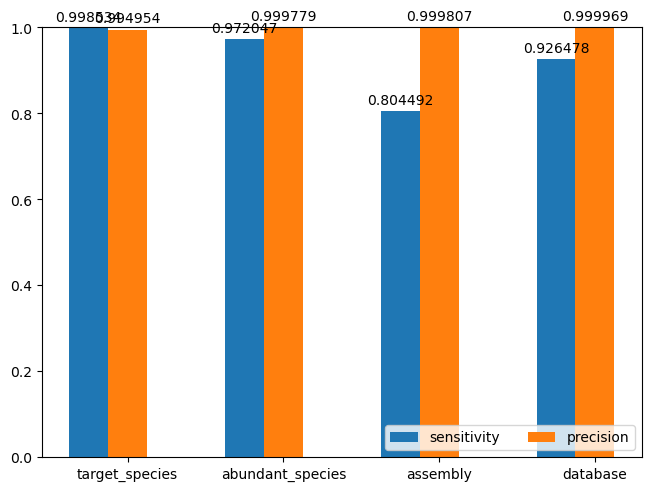

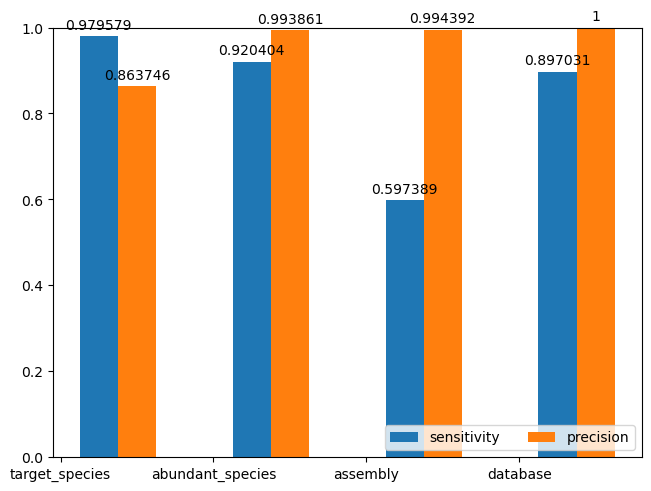

In [14]:
series = "2.1"
plot_sens_prec_read_n_snp(series)

total 1161038


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


target_species {'coli': 596155, 'Klebsiella_penumoniae': 2637, 'Clostridium_sporogenes': 20, 'Yersinia_enterocolitica': 712, 'Acinetobacter_pittii': 29, 'Plesiomonas_shigelloides': 786, 'Methanobrevibacter_smithii': 10, 'Bacteroides_fragilis': 57, 'Alcaligenes_sp.13f': 5, 'Enterobacter_cloacae': 3956, 'Aeromonas_sp.RHBSTW-01053': 3116, 'Vibrio_sp.PNUSAV000003': 227, 'Clostridioides_difficile': 13, 'Achromobacter_xylosoxidans': 12, 'Acinetobacter_sp.243_ASPC': 63, 'Enterococcus_sp.1140_ESPC': 6, 'Xylella_fastidiosa': 20, 'Fusobacterium_sp.B1827739B': 3, 'Lactobacillus_sp.PMB1279': 4, 'Campylobacter_coli': 5, 'Pseudomonas_aeruginosa': 32, 'Phocaeicola_dorei': 8, 'Enterococcus_faecalis': 13, 'Coprococcus_comes': 7, 'Clostridium_sp.PMB1557': 5, 'Campylobacter_jejuni': 3, 'Paeniclostridium_sordellii': 4, 'Streptococcus_constellatus': 4, 'Veillonella_spPMB1281': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


abundant_species {'coli': 160416, 'Plesiomonas_shigelloides': 9, 'Klebsiella_penumoniae': 422, 'Enterobacter_cloacae': 5, 'Bacteroides_fragilis': 9, 'Methanobrevibacter_smithii': 2, 'Yersinia_enterocolitica': 6, 'Acinetobacter_sp.243_ASPC': 1, 'Clostridium_sporogenes': 2, 'Enterococcus_faecalis': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


assembly {'coli': 64872, 'Plesiomonas_shigelloides': 15, 'Klebsiella_penumoniae': 288, 'Methanobrevibacter_smithii': 2, 'Bacteroides_fragilis': 6, 'Enterobacter_cloacae': 6, 'Clostridium_sporogenes': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


database {'coli': 153646, 'Plesiomonas_shigelloides': 6, 'Acinetobacter_pittii': 1, 'Klebsiella_penumoniae': 47, 'Bacteroides_fragilis': 4, 'Enterococcus_faecalis': 2, 'Yersinia_enterocolitica': 2, 'Clostridium_sporogenes': 2, 'Methanobrevibacter_smithii': 1, 'Vibrio_sp.PNUSAV000003': 2}
[2926624 2417343 1795873 2305429]


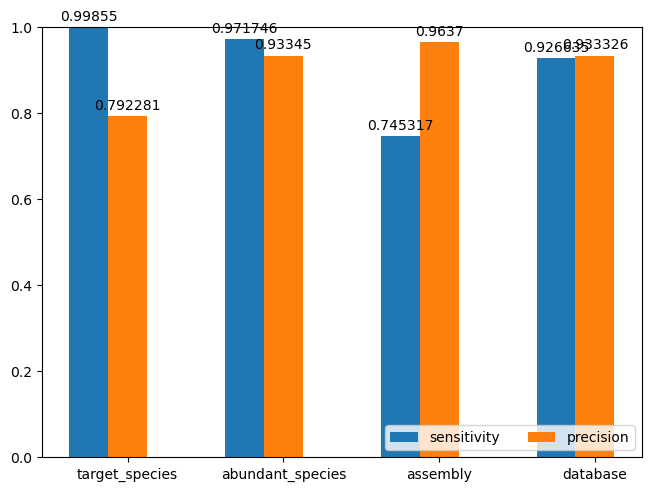

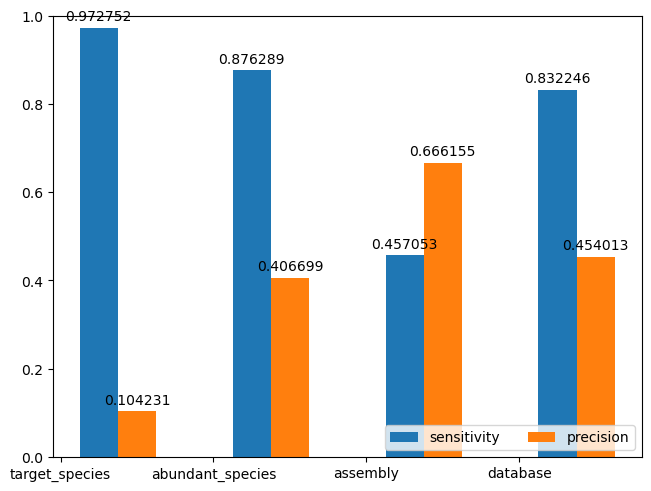

In [15]:
series = "2.2"
plot_sens_prec_read_n_snp(series)

total 1161038


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


target_species {'coli': 595980, 'marm': 252492, 'albt': 203986, 'Klebsiella_penumoniae': 2637, 'Clostridium_sporogenes': 20, 'Yersinia_enterocolitica': 712, 'Acinetobacter_pittii': 29, 'Plesiomonas_shigelloides': 786, 'Methanobrevibacter_smithii': 10, 'Bacteroides_fragilis': 57, 'Alcaligenes_sp.13f': 5, 'Enterobacter_cloacae': 3956, 'Aeromonas_sp.RHBSTW-01053': 3116, 'Vibrio_sp.PNUSAV000003': 227, 'Clostridioides_difficile': 13, 'Achromobacter_xylosoxidans': 12, 'Acinetobacter_sp.243_ASPC': 63, 'Enterococcus_sp.1140_ESPC': 6, 'Xylella_fastidiosa': 20, 'Fusobacterium_sp.B1827739B': 3, 'Lactobacillus_sp.PMB1279': 4, 'Campylobacter_coli': 5, 'Pseudomonas_aeruginosa': 32, 'Phocaeicola_dorei': 8, 'Enterococcus_faecalis': 13, 'Coprococcus_comes': 7, 'Clostridium_sp.PMB1557': 5, 'Campylobacter_jejuni': 3, 'Paeniclostridium_sordellii': 4, 'Streptococcus_constellatus': 4, 'Veillonella_spPMB1281': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


abundant_species {'coli': 159514, 'marm': 3889, 'albt': 3726, 'Plesiomonas_shigelloides': 18, 'Klebsiella_penumoniae': 426, 'Bacteroides_fragilis': 11, 'Vibrio_sp.PNUSAV000003': 2, 'Methanobrevibacter_smithii': 2, 'Enterobacter_cloacae': 7, 'Yersinia_enterocolitica': 4, 'Clostridium_sporogenes': 2, 'Enterococcus_faecalis': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


assembly {'coli': 69886, 'marm': 3529, 'albt': 2852, 'Vibrio_sp.PNUSAV000003': 2, 'Klebsiella_penumoniae': 271, 'Bacteroides_fragilis': 9, 'Plesiomonas_shigelloides': 19, 'Methanobrevibacter_smithii': 2, 'Enterobacter_cloacae': 3, 'Enterococcus_faecalis': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


database {'marm': 6402, 'albt': 4769, 'coli': 152554, 'Plesiomonas_shigelloides': 6, 'Acinetobacter_pittii': 1, 'Klebsiella_penumoniae': 47, 'Bacteroides_fragilis': 4, 'Enterococcus_faecalis': 2, 'Yersinia_enterocolitica': 2, 'Clostridium_sporogenes': 2, 'Methanobrevibacter_smithii': 1, 'Vibrio_sp.PNUSAV000003': 2}
[3382896 2423137 1792100 2314350]


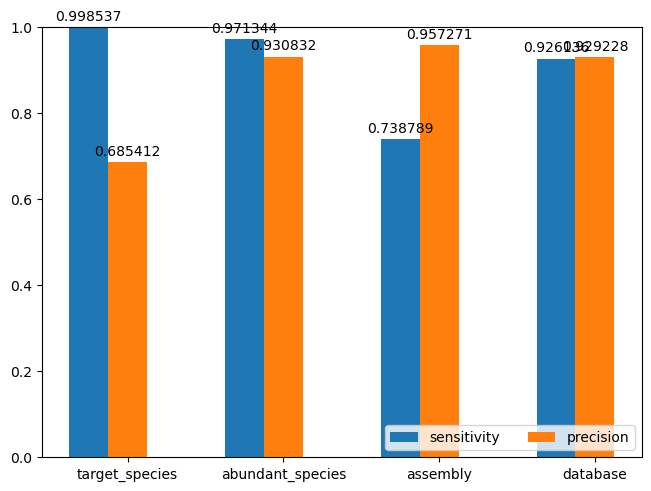

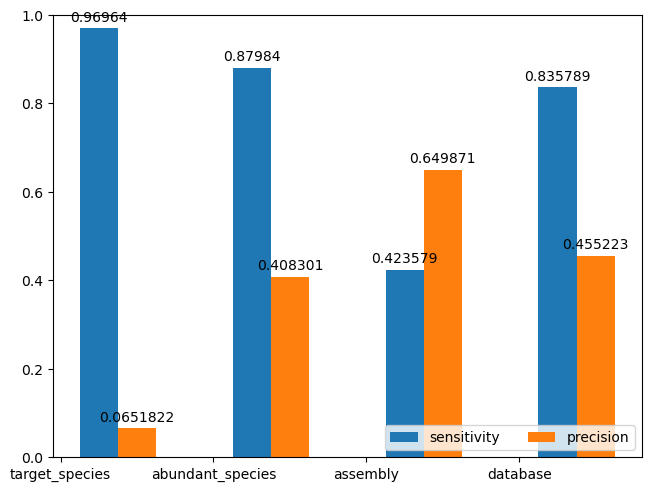

In [16]:
series = "2.3"
plot_sens_prec_read_n_snp(series)

total 1161038


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


target_species {'albt': 202785, 'Klebsiella_penumoniae': 2637, 'Clostridium_sporogenes': 20, 'Yersinia_enterocolitica': 712, 'Acinetobacter_pittii': 29, 'Plesiomonas_shigelloides': 786, 'Methanobrevibacter_smithii': 10, 'Bacteroides_fragilis': 57, 'Alcaligenes_sp.13f': 5, 'Enterobacter_cloacae': 3956, 'Aeromonas_sp.RHBSTW-01053': 3116, 'Vibrio_sp.PNUSAV000003': 227, 'Clostridioides_difficile': 13, 'Achromobacter_xylosoxidans': 12, 'Acinetobacter_sp.243_ASPC': 63, 'Enterococcus_sp.1140_ESPC': 6, 'Xylella_fastidiosa': 20, 'Fusobacterium_sp.B1827739B': 3, 'Lactobacillus_sp.PMB1279': 4, 'Campylobacter_coli': 5, 'Pseudomonas_aeruginosa': 32, 'Phocaeicola_dorei': 8, 'Enterococcus_faecalis': 13, 'Coprococcus_comes': 7, 'Clostridium_sp.PMB1557': 5, 'Campylobacter_jejuni': 3, 'Paeniclostridium_sordellii': 4, 'Streptococcus_constellatus': 4, 'Veillonella_spPMB1281': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


abundant_species {'albt': 3622, 'Klebsiella_penumoniae': 450, 'Plesiomonas_shigelloides': 19, 'Yersinia_enterocolitica': 6, 'Enterobacter_cloacae': 12, 'Bacteroides_fragilis': 9, 'Vibrio_sp.PNUSAV000003': 2, 'Methanobrevibacter_smithii': 2, 'Clostridioides_difficile': 1, 'Enterococcus_faecalis': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


assembly {'albt': 2955, 'Plesiomonas_shigelloides': 16, 'Yersinia_enterocolitica': 12, 'Phocaeicola_dorei': 2, 'Klebsiella_penumoniae': 243, 'Enterobacter_cloacae': 8, 'Bacteroides_fragilis': 11, 'Methanobrevibacter_smithii': 2, 'Vibrio_sp.PNUSAV000003': 2, 'Enterococcus_faecalis': 2}


[W::vcf_parse] Contig 'NC_011740.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NC_011743.1' is not defined in the header. (Quick workaround: index the file with tabix.)


database {'albt': 4784, 'Plesiomonas_shigelloides': 6, 'Acinetobacter_pittii': 1, 'Klebsiella_penumoniae': 47, 'Bacteroides_fragilis': 4, 'Enterococcus_faecalis': 2, 'Yersinia_enterocolitica': 2, 'Clostridium_sporogenes': 2, 'Methanobrevibacter_smithii': 1, 'Vibrio_sp.PNUSAV000003': 2}
[2533131 2260899 1659456 2155476]


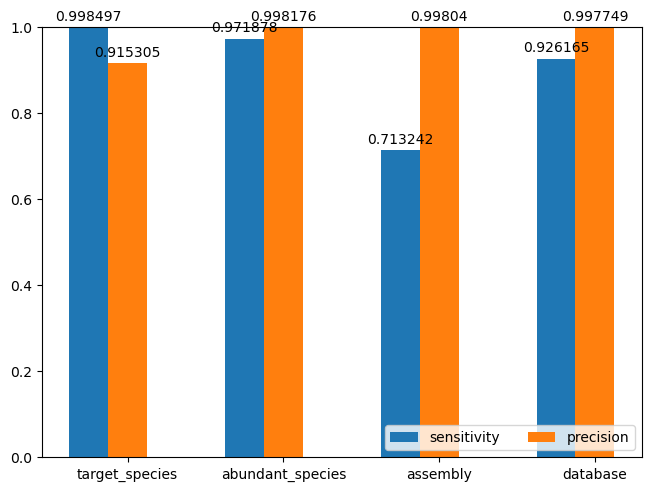

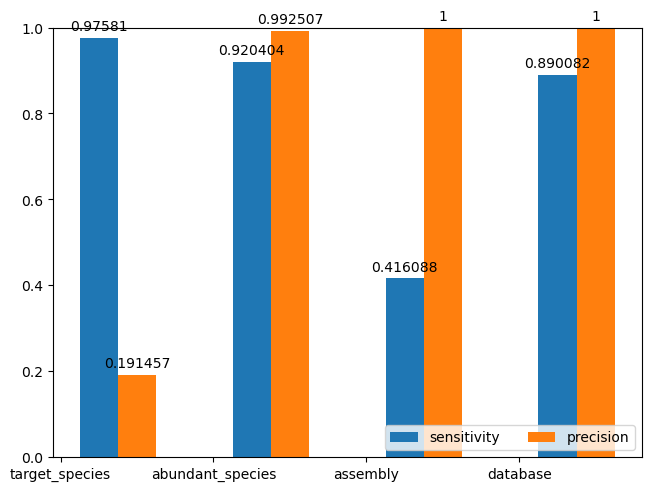

In [17]:
series = "2.4"
plot_sens_prec_read_n_snp(series)